# DATA100 Final Project | Strategy Games Exploration

**Authors** - Qutub Khan Vajihi & Hongyang Bobby Zheng

**Abstract**


With the entire boom of the gaming industry it is evident that the mobile gaming arena is also catching up and is inflating in popularity. In this project we explore a subset of this data, in the form of strategy games from the Apple Appstore, and apply data science methods to predict how well games perform based on a variety of features and factors. We further our analysis to use some natural language processing techniques to explore how game descriptions impact their ratings. 

**Introduction**

Gaming datasets are oftentimes rich with a lot of information which can be used to explore trends and patterns. To take advantage of this, we base our research primarily on the below questions? 

1. Is there a way we can predict the ratings of the games using **all** the features in the given dataset? What are the key relationships and what are some exciting patterns? Do these findings augment our understanding of the gaming domain and provide us insight into the app development market? _(We essentially treat this a classification problem)_.
2. We notice the _description_ of the games available in the dataset. Using NLP techniques, we want to know if using **only** the description of the game there is any way we can predict the rating? 


**Description of Data**

We have a dataset obtained from Kaggle (https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games) which contains a set of 17007 games with around 13 features. 

This includes features like _Game Name, Average User Rating, User Rating Count, Price, In-App Purchases, Description, Developer, Age Rating, Languages, Size, Genres, Original Release Date & Current Version Date._

**Description of Methods**

The project is split in two section : In parts 1 to 4 we will work on the entire dataset to use its features to predict the 'Average User Rating' of the games. We will perform data cleaning, pre-processing, exploratory data analysis, feature engineering, model selection and model validation. We will be applying methods like logistic regression and random forest to perform the classification. Cross-validation will be used for model selection.

For the second section of the project we will apply some known and popular natural language processing methods to predict the same 'Average User Rating' using the description of the game. We will again perform data cleaning, pre-processing, model selection and visualization. The methods we will apply includes count vectorization, tf-idf vectorization and Doc2Vec embeddings. The models we will experiment with include Naive Bayes, Support Vector Machine and Logistic Regression. We will employ k-means for the clustering, and PCA/t-SNE for dimensionality reduction.

## First Section | Part 0: Load Packages and Dataset

We start off with our usual drill of importing packages and setting up the drive.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection 
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import re
from sklearn.preprocessing import PolynomialFeatures
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.colors as mcolors
import random
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.graph_objs as go
from sklearn.manifold import TSNE

In [2]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Below is a first look at our dataset!

In [2]:
#df = pd.read_csv('/content/drive/My Drive/DATA_100_project/appstore_games.csv')
df = pd.read_csv('appstore_games.csv')
df.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date
0,Sudoku,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",11/7/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,"Games, Strategy, Board",11/7/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,"Games, Board, Strategy",11/7/2008,5/9/2017
3,Sudoku (Free),3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [4]:
df.describe(include='all')

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date
count,17007,7561.000000,7.561000e+03,16983.000000,7683,17007,17007,17007,16947,1.700600e+04,17007,17007,17007
unique,16847,NaN,NaN,NaN,3803,16473,8693,4,990,NaN,1004,3084,2512
top,Alien Path,NaN,NaN,NaN,0.99,#NAME?,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,NaN,"Games, Strategy, Puzzle",2/9/2016,1/8/2019
freq,2,NaN,NaN,NaN,943,17,123,11806,12467,NaN,778,75,118
mean,NaN,4.060905,3.306531e+03,0.813419,NaN,NaN,NaN,NaN,NaN,1.157064e+08,NaN,NaN,NaN
std,NaN,0.751428,4.232256e+04,7.835732,NaN,NaN,NaN,NaN,NaN,2.036477e+08,NaN,NaN,NaN
min,NaN,1.000000,5.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,5.132800e+04,NaN,NaN,NaN
25%,NaN,3.500000,1.200000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,2.295014e+07,NaN,NaN,NaN
50%,NaN,4.500000,4.600000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,5.676895e+07,NaN,NaN,NaN
75%,NaN,4.500000,3.090000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,1.330271e+08,NaN,NaN,NaN


In [5]:
df.shape

(17007, 13)

We have a total of 17007 rows and 13 columns. The columns are an assortment of numerical and categorical values, so we have plenty to play around with.

## **First Section | Part 1: Data Cleaning & Preprocessing**

We now start by first searching for any kind of null values in our dataset.

In [3]:
dataset = df.copy()
# View missing values
display(dataset.isnull().sum())

Name                               0
Average User Rating             9446
User Rating Count               9446
Price                             24
In-app Purchases                9324
Description                        0
Developer                          0
Age Rating                         0
Languages                         60
Size                               1
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

Our target variable 'Average User Rating' has a huge number of null values and since it isn't entirely beneficial for us to replace them with something else, we drop them. One main reason we do not want to include this in our dataset is that the null in them just indicates that they possibly haven't been rated yet and imputing them with another value would corrupt its true meaning. For now, we treat the data as is.

In [5]:
dataset = dataset[~dataset['Average User Rating'].isna()]
display(dataset.isnull().sum())
dataset.shape

Name                               0
Average User Rating                0
User Rating Count                  0
Price                              0
In-app Purchases                2927
Description                        0
Developer                          0
Age Rating                         0
Languages                         24
Size                               0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

(7561, 13)

We see that we are left with 7561 games for now, which is good enough for our exploration. 
Next, we see 2927 games having _NaN_ values for 'In-app Purchases', which just means 0 or that these apps do not have in-purchases. We safely replace the _NaNs_ with 0.

In [6]:
dataset[['In-app Purchases']] = dataset[['In-app Purchases']].fillna(0.0)
display(dataset.isnull().sum())

Name                             0
Average User Rating              0
User Rating Count                0
Price                            0
In-app Purchases                 0
Description                      0
Developer                        0
Age Rating                       0
Languages                       24
Size                             0
Genres                           0
Original Release Date            0
Current Version Release Date     0
dtype: int64

We have a fractional portion of the dataset with missing values i.e. 24 NaN for languages. We drop these leftover _NaNs_ too.

In [7]:
dataset.dropna(inplace=True)
# See NaN values after dropping
display(dataset.isnull().sum())
dataset.shape

Name                            0
Average User Rating             0
User Rating Count               0
Price                           0
In-app Purchases                0
Description                     0
Developer                       0
Age Rating                      0
Languages                       0
Size                            0
Genres                          0
Original Release Date           0
Current Version Release Date    0
dtype: int64

(7537, 13)

In [8]:
dataset.describe(include='all')

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date
count,7537,7537.000000,7.537000e+03,7537.000000,7537.0,7537,7537,7537,7537,7.537000e+03,7537,7537,7537
unique,7464,NaN,NaN,NaN,2956.0,7355,4261,4,789,NaN,622,2761,2166
top,Zombo Buster Rising,NaN,NaN,NaN,0.0,How many levels can you go? How deep can you c...,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,NaN,"Games, Simulation, Strategy",22/04/2018,1/8/2019
freq,2,NaN,NaN,NaN,2919.0,11,115,4453,5007,NaN,289,27,61
mean,NaN,4.061364,3.315132e+03,0.572331,NaN,NaN,NaN,NaN,NaN,1.513555e+08,NaN,NaN,NaN
std,NaN,0.750607,4.238955e+04,2.418929,NaN,NaN,NaN,NaN,NaN,2.550948e+08,NaN,NaN,NaN
min,NaN,1.000000,5.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,2.158400e+05,NaN,NaN,NaN
25%,NaN,3.500000,1.200000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,3.065037e+07,NaN,NaN,NaN
50%,NaN,4.500000,4.600000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,7.954944e+07,NaN,NaN,NaN
75%,NaN,4.500000,3.100000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,1.776138e+08,NaN,NaN,NaN


In [9]:
dataset['In-app Purchases'].unique()

array([0.0, '1.99', '0.99', ...,
       '7.99, 13.99, 2.99, 3.99, 7.99, 1.99, 1.99, 16.99, 3.99',
       '4.99, 1.99, 9.99, 4.99, 4.99, 4.99, 4.99, 4.99',
       '1.99, 1.99, 1.99, 2.99, 5.99, 3.99, 5.99, 2.99, 1.99, 4.99'],
      dtype=object)

Our 'In-app Purchases' needs to be modified a little since some cells contain a list of numbers. For simplicity, we take the average of these prices and put them as one price value. 

In [10]:
# Clean up in_app purchase column
dataset['In-app Purchases'] = dataset['In-app Purchases'].astype(str)

def avg_in_app(text):
  prices = np.array(text.split(','))
  return prices.astype(float).mean()
dataset['In-app Purchases'] = dataset['In-app Purchases'].apply(avg_in_app)
dataset['In-app Purchases'].unique()


array([ 0.        ,  1.99      ,  0.99      , ...,  4.74      ,
       17.32333333,  6.87888889])

Finally, we set aside our target and the remaining dataset for further analysis. 

In [13]:
# Set target set
target = dataset['Average User Rating']
# Features
games = dataset.iloc[:,2:]
# Check shape and value of features and target
display(games.shape,target.shape)


(7537, 11)

(7537,)

In [12]:
games.columns

Index(['User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Genres',
       'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [14]:
np.sort(target.unique())

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

_**The above 9 values are our target classes. And after excluding the game names, we have 11 features to work with.**_

## First Section | **Part 2: Exploratory Data Analysis**

We now begin our EDA and see if there are any interesting relationships we can identify visually. We first see the distribution of our target variable 'Average User Rating'.

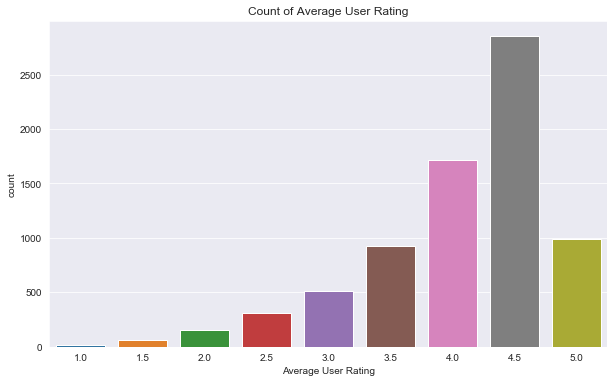

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(target)# seaborn
plt.title('Count of Average User Rating')
plt.show()

There certainly is a very large class imbalance i.e. games with a 4.5 rating dominate the dataset. 
Collapsing the categories into fewer categories doesn't seem very intuitive at the moment as we may lose essential information. This would certainly make our classification a little harder, but we're okay with that. 

We go ahead and start seeing relationships between the various features and our target variable. Starting with prices. 

Text(0.5, 1.0, 'Relationship between Price and Rating')

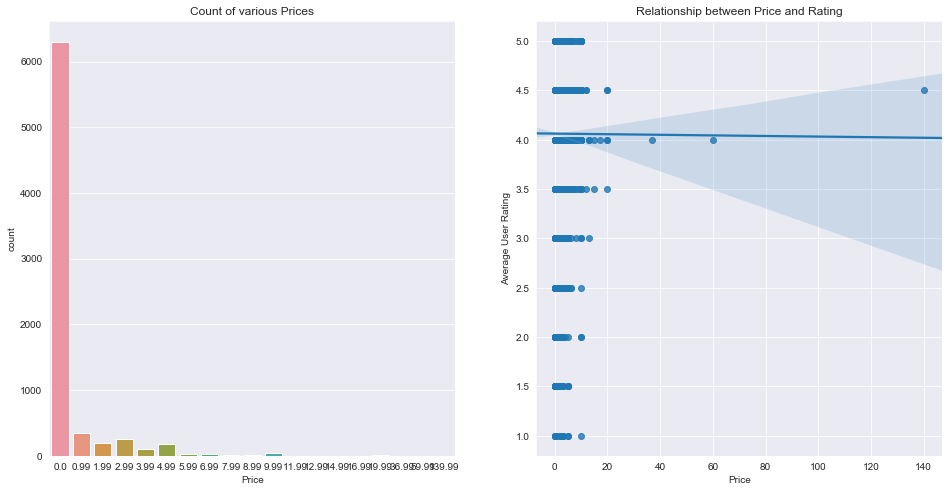

In [45]:
# make a copy of dataset and clean
chart_data = dataset.copy()

# count by different price points
fig, ax = plt.subplots(1,2,figsize=(16, 8))
sns.countplot(data=chart_data, x="Price",ax = ax[0])
sns.regplot(data=chart_data, x='Price', y='Average User Rating',ax = ax[1])
ax[0].set_title('Count of various Prices')
ax[1].set_title('Relationship between Price and Rating')

The left graph shows us that most of the games seem to be free. We need to view this without the skew.  
On the right graph, we notice a lot of outliers. 

Text(0.5, 1.0, 'Relationship between Price and Rating')

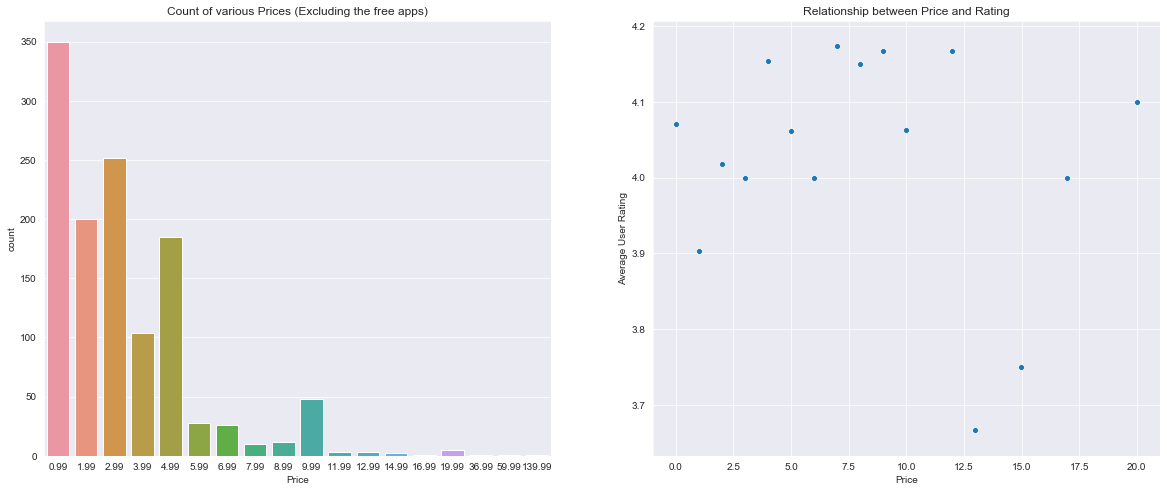

In [65]:
# Cleaning up the outliers

# def drop_outlier_prc(df,clm,prc):
#   df = df.loc[chart_data[clm] < prc]
#   return df
# chart_data = drop_outlier_prc(chart_data,'Price',20)

outlier_cutoff = 20

fig, ax = plt.subplots(1,2,figsize=(20, 8))
sns.countplot(data=chart_data[chart_data.Price > 0], x="Price",ax = ax[0])
sns.scatterplot(x = 'Price', y = 'Average User Rating', data = chart_data[chart_data['Price'] < outlier_cutoff].groupby('Price').mean().reset_index(),ax = ax[1])
ax[0].set_title('Count of various Prices (Excluding the free apps)')
ax[1].set_title('Relationship between Price and Rating')


The left chart now shows that most of the games are priced below 10$. 

The scatterplot on the right is a slightly modified version of the previous graph above. It is created with the means of average user ratings against prices, instead of plotting them all together. Its fairly clear that for all price points, the average of ratings of games at that price point is above 3.6, which is worth noting. 

We now see the sizes of games. 

Text(0.5, 1.0, 'Relationship between Size and Rating')

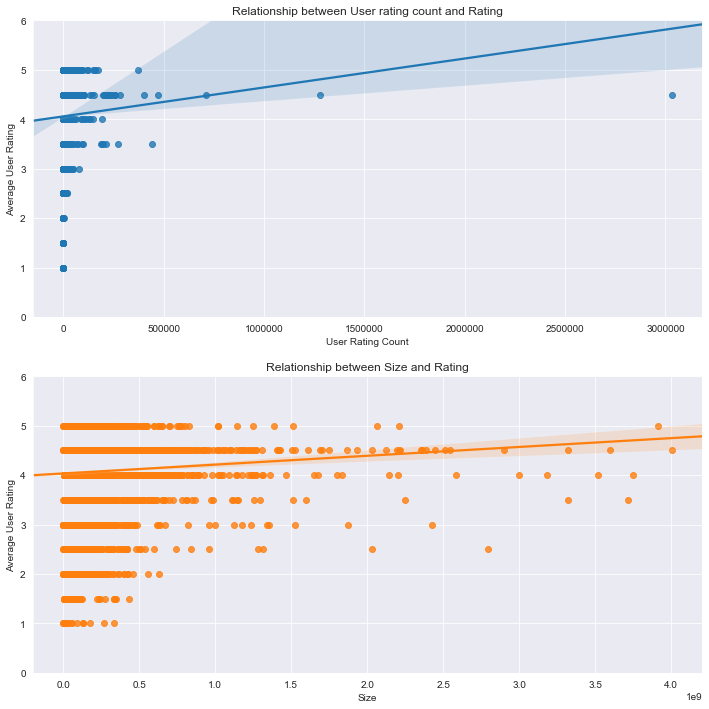

In [61]:
# Relationship if any between Count of rating and size and AUR
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,1,figsize=(12, 12))
sns.regplot(data=chart_data, x='User Rating Count', y='Average User Rating',ax = ax[0])
sns.regplot(data=chart_data, x='Size', y='Average User Rating',ax = ax[1])
ax[0].set_ylim(0,6)
ax[0].set_title('Relationship between User rating count and Rating')
ax[1].set_ylim(0,6)
ax[1].set_title('Relationship between Size and Rating')

Higher user ratings and larger game sizes seem to point to better ratings. However, as earlier, there seems to occur a similar outlier issue. Let's drop the outliers and see if the relationship still holds. 

Text(0.5, 1.0, 'Relationship between Size and Rating')

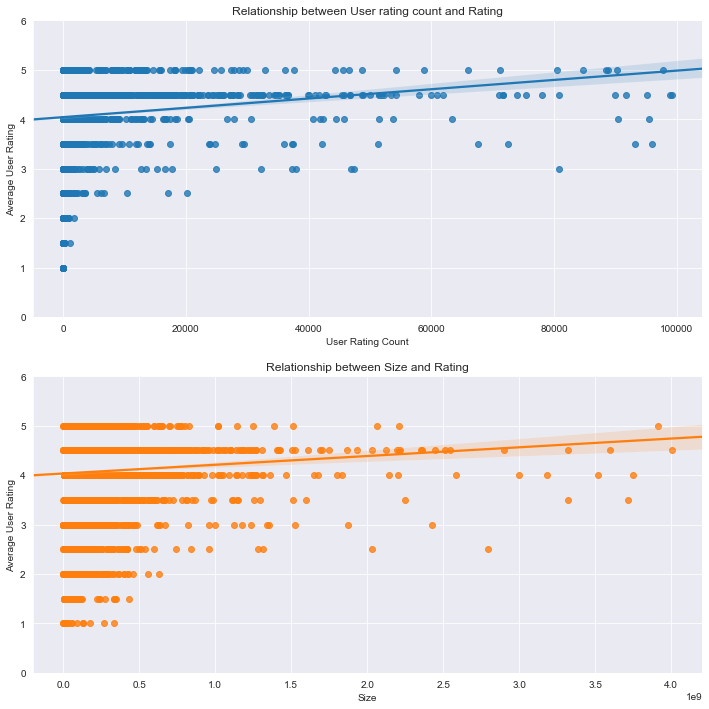

In [62]:
chart_data = drop_outlier_prc(chart_data,'User Rating Count',100000)
fig, ax = plt.subplots(2,1,figsize=(12, 12))
sns.regplot(data=chart_data, x='User Rating Count', y='Average User Rating',ax = ax[0])
sns.regplot(data=chart_data, x='Size', y='Average User Rating',ax = ax[1])
ax[0].set_ylim(0,6)
ax[0].set_title('Relationship between User rating count and Rating')
ax[1].set_ylim(0,6)
ax[1].set_title('Relationship between Size and Rating')

Not a very major change! We will have to explore further, but it is worth including this feature in our model.

count    7.497000e+03
mean     1.509934e+08
std      2.543799e+08
min      2.158400e+05
25%      3.048243e+07
50%      7.903642e+07
75%      1.769892e+08
max      4.005591e+09
Name: Size, dtype: float64

Text(0.5, 1.0, 'Large Size Game vs User Rating')

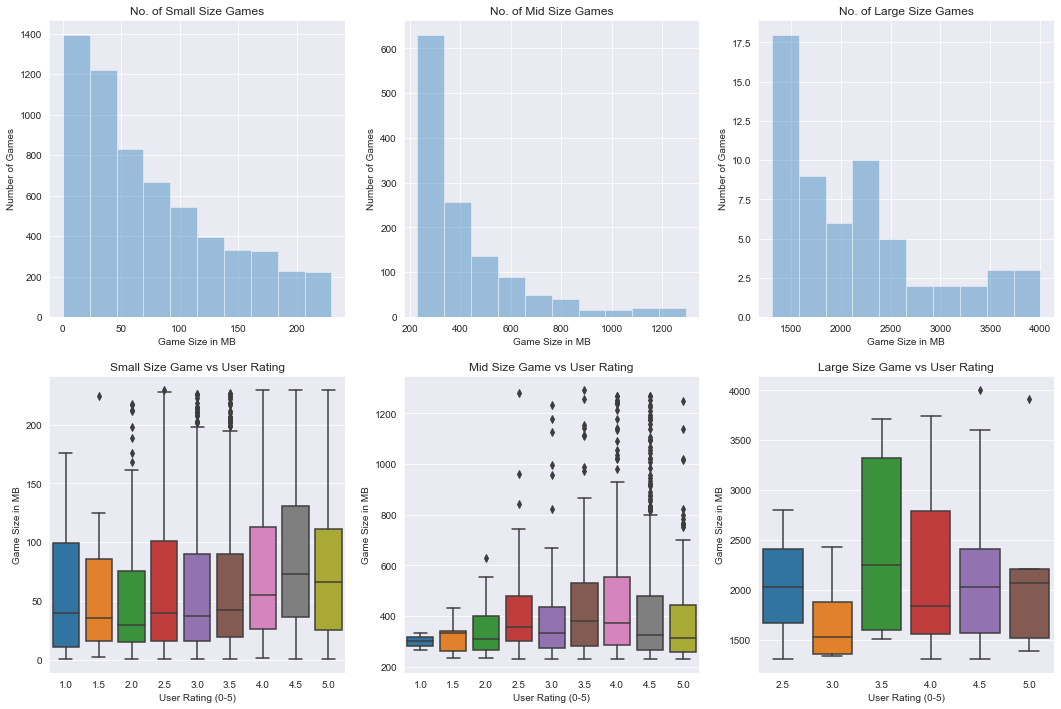

In [63]:
# Check distribution of size and break it down to small, median, and large sets.
display(chart_data.Size.describe())

chart_data['Size_in_MB'] = round(chart_data['Size']/1000000,1)
Small_size = chart_data[chart_data.Size_in_MB < 230]
Mid_size = chart_data[(chart_data.Size_in_MB >= 230) & (chart_data.Size_in_MB <1300)]
Large_size = chart_data[chart_data.Size_in_MB >=1300]

fig, axes = plt.subplots (2,3, figsize=(18,12))

vis1 = sns.distplot(Small_size.Size_in_MB, bins= 10, kde=False,ax=axes[0,0])
vis2 = sns.distplot(Mid_size.Size_in_MB, bins= 10, kde=False,ax=axes[0,1])
vis3 = sns.distplot(Large_size.Size_in_MB, bins= 10, kde=False,ax=axes[0,2])
vis4 = sns.boxplot(data = Small_size, x = 'Average User Rating', y = 'Size_in_MB',  ax=axes[1,0])
vis5 = sns.boxplot(data = Mid_size, x = 'Average User Rating', y = 'Size_in_MB', ax=axes[1,1])
vis6 = sns.boxplot(data = Large_size, x = 'Average User Rating', y = 'Size_in_MB', ax=axes[1,2],)

vis1.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis2.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis3.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis4.set(xlabel='User Rating (0-5)',ylabel='Game Size in MB')
vis5.set(xlabel='User Rating (0-5)',ylabel='Game Size in MB')
vis6.set(xlabel='User Rating (0-5)',ylabel='Game Size in MB')


axes[0, 0].set_title('No. of Small Size Games')
axes[0, 1].set_title('No. of Mid Size Games')
axes[0, 2].set_title('No. of Large Size Games')
axes[1, 0].set_title('Small Size Game vs User Rating')
axes[1, 1].set_title('Mid Size Game vs User Rating')
axes[1, 2].set_title('Large Size Game vs User Rating')


A huge number of games seem be <250MB in size. For small and medium sized games, the variability between user ratings seems high. For large games, they all seem to be rated above 2.5. This may be implying an underlying relationship that the state-of-art heavier games (assuming sophisticated features lead to larger games sizes) tend to have higher ratings.

Let's now take a look at the dates and see if we can obtain any information from them.

In [66]:
date_chart_data = chart_data.copy()
date_df = pd.to_datetime(date_chart_data['Current Version Release Date'])
date_chart_data['Current Version Release Date'] = date_df
date_chart_data['MONTH'] = date_df.dt.month
date_chart_data['YEAR'] = date_df.dt.year
date_chart_data.index = pd.DatetimeIndex(date_chart_data['Current Version Release Date'])

Text(0.5, 1.0, 'number of games by month')

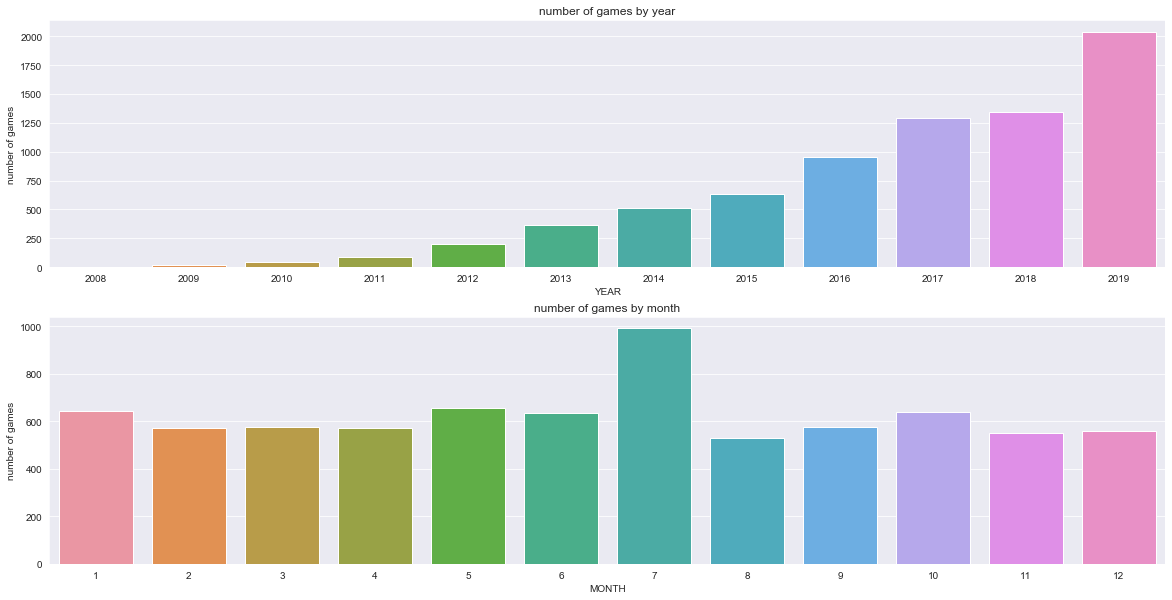

In [67]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(20,10))

sns.countplot(x="YEAR",data=date_chart_data,ax=ax1)
ax1.set_ylabel("number of games")
ax1.set_title("number of games by year")

sns.countplot(x="MONTH",data=date_chart_data,ax=ax2)
ax2.set_ylabel("number of games")
ax2.set_title("number of games by month")

Its very interesting to note the gradual increase in the number of games over the years. 2019 has a pretty large number of strategy games developed for the AppStore.

For the bottom graph, the spike in release date for July is surprising. We suspect that this maybe the end of school year and developers are strategically targeting such release dates and audiences.


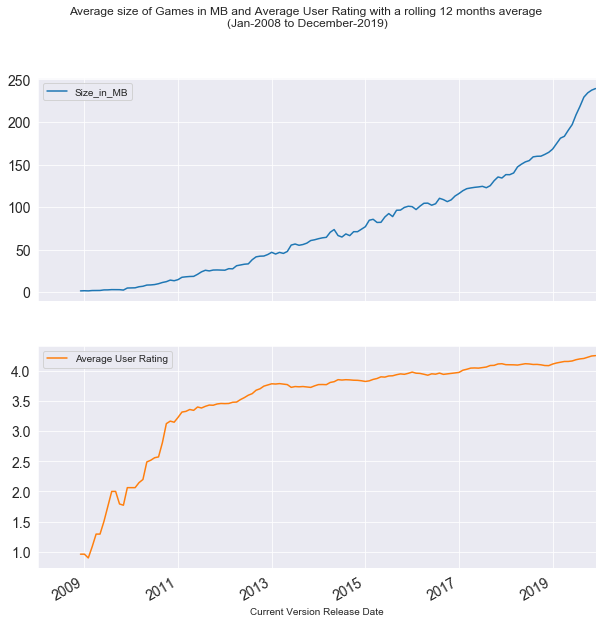

In [74]:
# Average size of games can also be related to date
size_by_date = chart_data.loc[:,['Current Version Release Date','Size_in_MB','Average User Rating']]
size_by_date['Current Version Release Date'] = pd.to_datetime(chart_data['Current Version Release Date'])
size_by_date = size_by_date.sort_values(by=['Current Version Release Date'])
size_by_date = size_by_date.set_index('Current Version Release Date')
monthly_size = size_by_date.resample('M').mean()
monthly_size = monthly_size.fillna(0)
monthly_size.rolling(12).mean().plot(legend=True,figsize=(10, 10), subplots=True,layout=(2, 1),title = 'Average size of Games in MB and Average User Rating with a rolling 12 months average \n(Jan-2008 to December-2019)',fontsize=14)
plt.show()

We once again see that games are getting more complicated and thereby bigger in size over time. 
However, the ratings are not simply linearly related to current version release dates. The average user ratings have grown over the years. This may be a classic survival technique developers follow, where games being updated frequently over the years are deemed as better games. This gives us a potentially important feature to include.

Let's assess the number of games released,

Text(0, 0.5, 'Count')

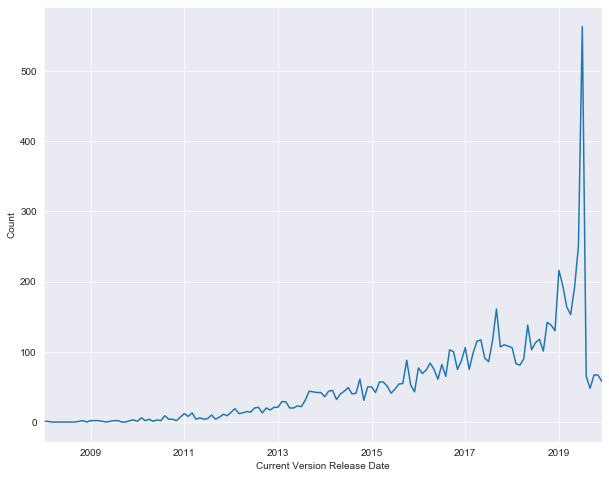

In [71]:
# graph count of games over the years... 
plt.figure(figsize = (10,8))
size_by_date.resample('M').size().plot()
plt.ylabel('Count')

We see a huge spike in 2019 as expected, since a large number of games were released and therefore the date is captured as the current version release date. 

Finally lets look at the Age Rating feature and then analyze the Genre feature. 

In [75]:
# Categorical Data Vis
Chart_genre = chart_data.copy()

# Generate genre set 
corpus = list(Chart_genre['Genres'].str.split(',').sum())
i = 0
for word in corpus : 
    if word[0]==' ':
        corpus[i] = word[1:]
    i +=1
genres_set = set(corpus)

# Create new features, one for each genre, and encode genre category
def x(Series) :
    if str(genre) in Series:
        return 1
    return 0

for genre in genres_set : 
    Chart_genre[genre] = Chart_genre['Genres'].apply(x)

Chart_genre.head()


,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,...,Emoji & Expressions,Kids & Family,Action,Gaming,Simulation,Food & Drink,Medical,Casino,Entertainment,Utilities
0,Sudoku,4.0,3553.0,2.99,0.00,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,...,0,0,0,0,0,0,0,0,0,0
1,Reversi,3.5,284.0,1.99,0.00,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,...,0,0,0,0,0,0,0,0,0,0
2,Morocco,3.0,8376.0,0.00,0.00,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,...,0,0,0,0,0,0,0,0,0,0
4,Senet Deluxe,3.5,28.0,2.99,0.00,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,...,0,0,0,0,0,0,0,0,0,0
5,Sudoku - Classic number puzzle,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,...,0,0,0,0,0,0,0,0,1,0


Text(0.5, 1.0, 'Average User rating by Age Rating')

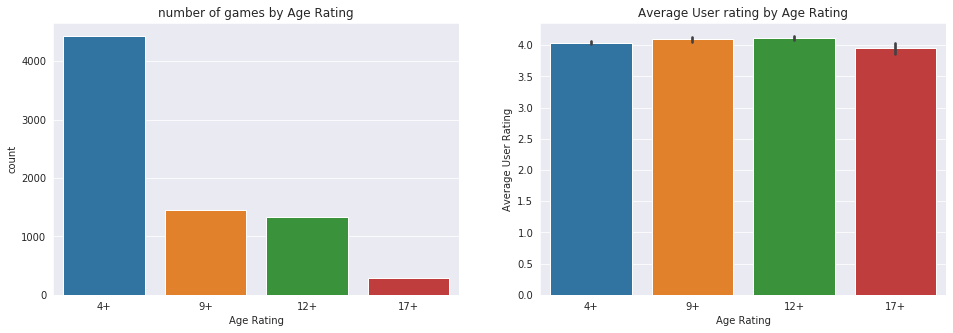

In [31]:
# Breakdown by Age Category
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,5))
sns.countplot(Chart_genre['Age Rating'],ax= ax1)
sns.barplot(x = 'Age Rating', y = 'Average User Rating', data = Chart_genre, ax = ax2)
ax1.set_title("number of games by Age Rating")
ax2.set_title("Average User rating by Age Rating")

Most games are developed for a 4+ target audience. A very small proportion of games is explicitly targeted at 17+ audience. This could also show how the younger generation and kids today are the prime targets of most game developers.

To finally analyze our Genre feature, (a few steps above) we created a feature for each **unique** genre and then for each game we marked a binary flag under every one of these genres. Below is a list of uniques genres. 

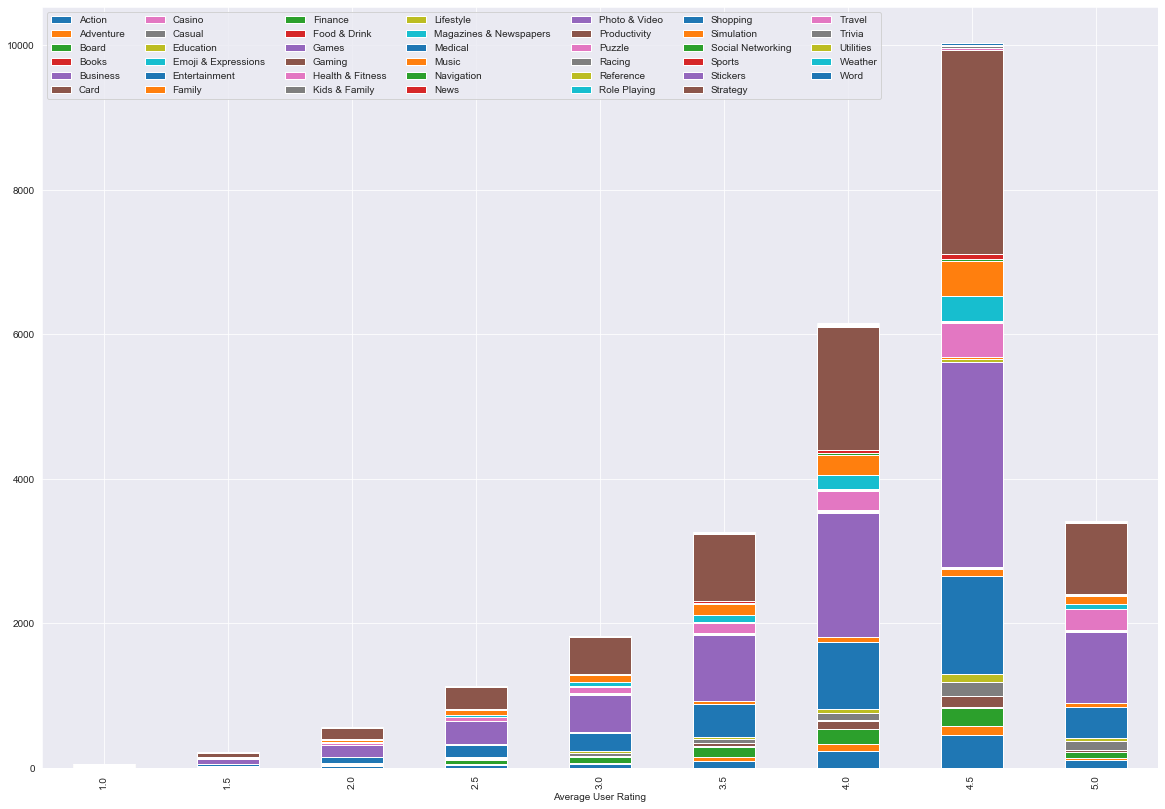

In [76]:
genre_list = ['Education', 'Role Playing', 'Simulation', 'Trivia','Health & Fitness', 'Reference', 'Social Networking', 'Games', 'Travel',
        'Kids & Family', 'Sports', 'Lifestyle','Casino', 'Racing', 'Finance', 'Emoji & Expressions', 'Navigation',
       'Entertainment', 'Card', 'Adventure', 'Stickers', 'Books', 'Magazines & Newspapers', 'Food & Drink',
       'Casual', 'Business', 'Medical', 'Word', 'Music','Puzzle', 'Action', 'Utilities', 'Photo & Video', 'Strategy','Shopping', 'News', 'Productivity', 'Weather', 'Gaming',
       'Board', 'Family']

genre_count_df = pd.pivot_table(Chart_genre, values= genre_list,aggfunc=np.sum,index= 'Average User Rating').plot.bar(stacked=True,figsize=(20,14))
plt.legend(loc='best',ncol = 7)

Not to our surprise, the large bands of brown and purple correspond to 'Strategy' and 'Games' and this is expected to occur a large number of times as all games have these two labels in them. 

## First Section | **Part 3: Feature Engineering**


We now start with our feature engineering. We first take the total languages count and make that a new feature. 

In [77]:
# Creating a new feature for number of languages
games['Languages_Count'] = games['Languages'].str.split(',').str.len()
games.head()

,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date,Languages_Count
0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",11/7/2008,30/05/2017,17
1,284.0,1.99,0.0,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,"Games, Strategy, Board",11/7/2008,17/05/2018,1
2,8376.0,0.00,0.0,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,"Games, Board, Strategy",11/7/2008,5/9/2017,1
3,190394.0,0.00,0.0,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,17
4,28.0,2.99,0.0,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,15


As performed earlier, we create a separate feature for each **unique** genre and then for each game we mark a binary flag under each of these categories.

In [78]:
# Generate genre set 
corpus = list(games['Genres'].str.split(',').sum())
i = 0
for word in corpus : 
    if word[0]==' ':
        corpus[i] = word[1:]
    i +=1
genres_set = set(corpus)

# Create new features, one for each genre, and encode genre category
def x(Series) :
    if str(genre) in Series:
        return 1
    return 0

for genre in genres_set : 
    games[genre] = games['Genres'].apply(x)

games.head()

,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Genres,Original Release Date,...,Emoji & Expressions,Kids & Family,Action,Gaming,Simulation,Food & Drink,Medical,Casino,Entertainment,Utilities
0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",11/7/2008,...,0,0,0,0,0,0,0,0,0,0
1,284.0,1.99,0.0,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,"Games, Strategy, Board",11/7/2008,...,0,0,0,0,0,0,0,0,0,0
2,8376.0,0.00,0.0,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,"Games, Board, Strategy",11/7/2008,...,0,0,0,0,0,0,0,0,0,0
3,190394.0,0.00,0.0,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",23/07/2008,...,0,0,0,0,0,0,0,0,0,0
4,28.0,2.99,0.0,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",18/07/2008,...,0,0,0,0,0,0,0,0,0,0


The dates seemed to be important based on our EDA. Here we try to extract the date difference between current version release date and original release date under the assumption that a well maintained game would potentially get rated better.

In [79]:
# Convert day different between current version release date and original release date into float
games['day_diff'] = (pd.to_datetime(games['Current Version Release Date']) - pd.to_datetime(games['Original Release Date'])).astype('timedelta64[D]')

From our description feature, we take a simple word count and create that as a new feature. We won't be using the Description column itself for this part of the analysis. We will focus on that in the second part with our NLP techniques. 

In [80]:
games['Description Length'] = games['Description'].str.split(" ").str.len()

So now we have the below columns, including all the newly created features. 

In [81]:
games.columns

Index(['User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Genres',
       'Original Release Date', 'Current Version Release Date',
       'Languages_Count', 'Business', 'Card', 'Stickers', 'Books',
       'Navigation', 'Education', 'Health & Fitness', 'Productivity', 'Music',
       'Family', 'Racing', 'Puzzle', 'Word', 'Photo & Video', 'Sports',
       'Social Networking', 'Trivia', 'Weather', 'Shopping', 'Adventure',
       'Games', 'Lifestyle', 'Role Playing', 'Board', 'Strategy', 'Casual',
       'Travel', 'Magazines & Newspapers', 'News', 'Reference', 'Finance',
       'Emoji & Expressions', 'Kids & Family', 'Action', 'Gaming',
       'Simulation', 'Food & Drink', 'Medical', 'Casino', 'Entertainment',
       'Utilities', 'day_diff', 'Description Length'],
      dtype='object')

We now build the below function to create a design-matrix that scales all numerical features (using standard scaler) and converts all categorical features into a one-hot encoded feature set.

In [83]:
# Select feature for models
feat_space = games.copy()
numerical_vars = ['User Rating Count', 'Price', 'Size','In-app Purchases','Languages_Count','day_diff', 'Description Length']
categorical_vars = ['Age Rating', 'Developer']

# Design Matrix Transformation
def design_matrix(df):
    scaler = StandardScaler()
    scaler.fit(df[numerical_vars])
    scaled = df[numerical_vars].copy()
    scaled.iloc[:,:] = scaler.transform(scaled) # Convert to standard units
    categoricals = [pd.get_dummies(df[s], prefix=s, drop_first=True) for s in categorical_vars]
    return pd.concat([scaled] + categoricals, axis=1)

# Scale train and attach genre info
genre_df = games.loc[:,'Business':'Board']
feat_space = design_matrix(feat_space)
feat_space= pd.concat([feat_space,genre_df],axis = 1)

# Categorize target data
target_cat = (target).astype(str)

### Train-Test Split

We finally set aside our train and test sets to start the model building. We use 10% of the data for the test set. 

In [98]:
# Set aside a testing set
games_train, games_test, target_train, target_test = model_selection.train_test_split(feat_space, target_cat, test_size=0.1,random_state = 2021)
display(games_train.shape,target_train.shape,games_test.shape,target_test.shape)

(6783, 4294)

(6783,)

(754, 4294)

(754,)

See below the distribution of the data in both our sets. 

In [88]:
target_test.value_counts()

4.5    267
4.0    162
5.0    102
3.5    100
3.0     57
2.5     41
2.0     19
1.5      4
1.0      2
Name: Average User Rating, dtype: int64

In [85]:
target_train.value_counts()

4.5    2585
4.0    1557
5.0     884
3.5     823
3.0     456
2.5     273
2.0     137
1.5      56
1.0      12
Name: Average User Rating, dtype: int64

## First Section | **Part 4: Model Selection and Model Validation**

As we had mentioned earlier, we are dealing with a classification problem here with 9 classes. We therefore initiate three models - A multinomial Logistic Regression, a Decision Tree and a Random Forest.

In [89]:
# Model building and tweaking 

# Logistic Regression
#classifier_logistic = LogisticRegression(penalty='l2',multi_class='multinomial', dual=False, tol=0.0001, C=1.5, class_weight=None, random_state=None, solver='lbfgs', max_iter=300) # larger C -->  less overfit penality
classifier_logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 500)

# Decision Tree
classifier_DT = DecisionTreeClassifier(max_depth=50, min_samples_leaf=2) 

# Random Forest
classifier_RF = RandomForestClassifier()


Right off the bat, we train them on our data and then use the test set for accuracy scores. After that we will perform cross validation to pick the right model. 

In [90]:
# Train three different models and test on testing set
classifier_logistic.fit(games_train,target_train); 
classifier_DT.fit(games_train,target_train);
classifier_RF.fit(games_train,target_train);

lg_train_accuracy = sum(classifier_logistic.predict(games_train) == target_train) / len(target_train)
dt_train_accuracy = sum(classifier_DT.predict(games_train) == target_train) / len(target_train)
rf_train_accuracy = sum(classifier_RF.predict(games_train) == target_train) / len(target_train)

print(f"Logistic Regression Train accuracy: {lg_train_accuracy:.4f}")
print(f"Decision Tree Train accuracy: {dt_train_accuracy:.4f}")
print(f"Random Forest Train accuracy: {rf_train_accuracy:.4f}")

lg_test_accuracy = sum(classifier_logistic.predict(games_test) == target_test) / len(target_test)
dt_test_accuracy = sum(classifier_DT.predict(games_test) == target_test) / len(target_test)
rf_test_accuracy = sum(classifier_RF.predict(games_test) == target_test) / len(target_test)

print('\n')
print(f"Logistic Regression Test accuracy: {lg_test_accuracy:.4f}")
print(f"Decision Tree Test accuracy: {dt_test_accuracy:.4f}")
print(f"Random Forest Test accuracy: {rf_test_accuracy:.4f}")

C:\Users\qkava\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Logistic Regression Train accuracy: 0.6634
Decision Tree Train accuracy: 0.8268
Random Forest Train accuracy: 0.9858


Logistic Regression Test accuracy: 0.3846
Decision Tree Test accuracy: 0.2838
Random Forest Test accuracy: 0.3714


Both the logistic regression and random forest have similar accuracy on our test sets. We now use 5-fold Cross Validation to get the accuracy for each of these models.

In [91]:
# Name Classifier for loop
model_names = ['Logistic Regression','Decision Tree','Random Forest']
model_list = [classifier_logistic, classifier_DT, classifier_RF]
count = 0

# Loop through classifiers
for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier,games_train,target_train,cv=5);
    print(cv_score)
    print('CV Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    print ('\n')
    count += 1

[0.41366642 0.40470935 0.39823009 0.39586411 0.40206948]
CV Model accuracy of Logistic Regression is: 0.403


[0.2850845  0.28844739 0.29572271 0.29837518 0.29490022]
CV Model accuracy of Decision Tree is: 0.293


[0.37031594 0.39072848 0.38716814 0.38478582 0.40059128]
CV Model accuracy of Random Forest is: 0.387




Our cross validation scores indicate that the Logistic Regression performs much better. We could choose the Logistic Regression model as our supreme model of choice, but before that we are also interested in seeing how both these models treated the features and which features were more important than the other. Before that, below are the classification and confusion matrices for both the models.

C:\Users\qkava\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       0.00      0.00      0.00         4
         2.0       0.00      0.00      0.00        19
         2.5       0.00      0.00      0.00        41
         3.0       0.09      0.02      0.03        57
         3.5       0.24      0.08      0.12       100
         4.0       0.38      0.26      0.31       162
         4.5       0.40      0.82      0.54       267
         5.0       0.40      0.19      0.25       102

    accuracy                           0.38       754
   macro avg       0.17      0.15      0.14       754
weighted avg       0.32      0.38      0.31       754



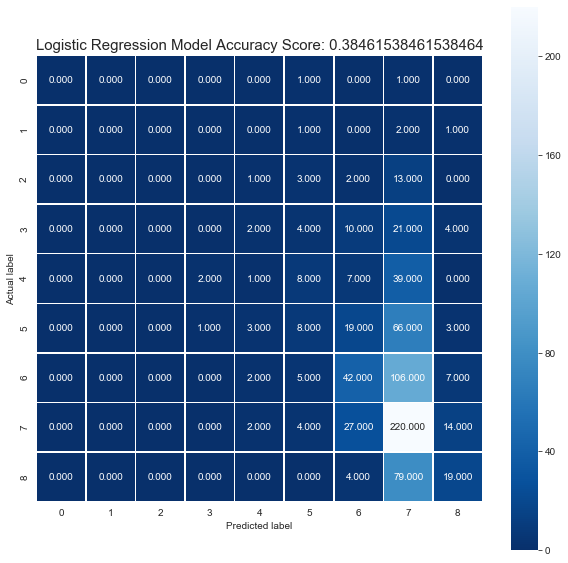

In [102]:
# Logistic Regression's Classification Report & Confusion Matrix

predictions = classifier_logistic.predict(games_test)
print(classification_report(target_test, predictions));

cm = metrics.confusion_matrix(target_test, classifier_logistic.predict(games_test))
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Logistic Regression Model Accuracy Score: {0}'.format(lg_test_accuracy)
plt.title(all_sample_title, size = 15);

C:\Users\qkava\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         1.5       0.00      0.00      0.00         4
         2.0       0.00      0.00      0.00        19
         2.5       0.12      0.07      0.09        41
         3.0       0.19      0.09      0.12        57
         3.5       0.19      0.15      0.17       100
         4.0       0.32      0.33      0.33       162
         4.5       0.47      0.68      0.56       267
         5.0       0.31      0.21      0.25       102

    accuracy                           0.37       754
   macro avg       0.18      0.17      0.17       754
weighted avg       0.33      0.37      0.34       754



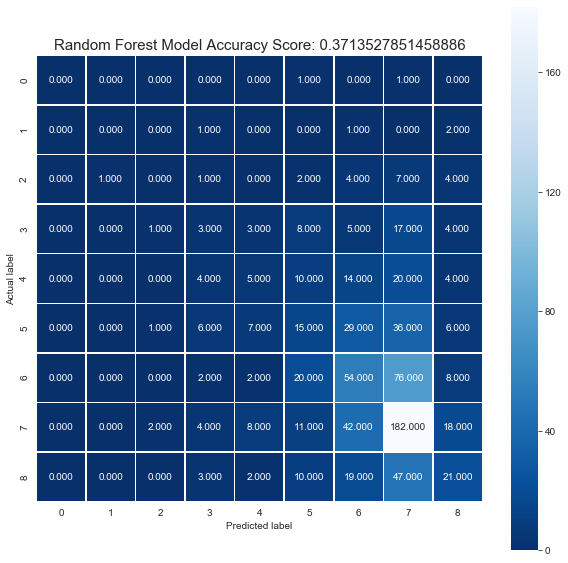

In [101]:
# Random Forest's Classification Report & Confusion Matrix

from sklearn import metrics

predictions = classifier_RF.predict(games_test)
print(classification_report(target_test, predictions));

cm = metrics.confusion_matrix(target_test, classifier_RF.predict(games_test))
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Random Forest Model Accuracy Score: {0}'.format(rf_test_accuracy)
plt.title(all_sample_title, size = 15);

Logistic Regressions has a slightly higher accuracy on test set. The precision and recall are very close for most of the classes for both the models, expect for the majority class of 4 and 4.5. The overall F1 scores for both models are very close. 

Finally, we see the feature importance of both our models to see if our choice of features based on EDA and the model's choice are aligned. 

In [105]:
# Feature Importance for Logistic Regression

# Logistic Regression
classifier_logistic.coef_[0]
print('\n\nLogistic Regression (L2) feature Importance:')
for k,v in sorted(zip(map(lambda x:round(x,4), classifier_logistic.coef_[0]),games_train.columns),reverse=True) :
    print(v + ": " + str(k))




Logistic Regression (L2) feature Importance:
Developer_willie shi: 1.8959
Developer_Evgeni Petkov: 0.9919
Developer_\xc1lvaro Girona: 0.9889
Developer_Tony Walsh: 0.9858
Developer_Sandy Knoll Software, LLC: 0.9828
Developer_One Connection Media: 0.9622
Developer_li xiaolong: 0.9424
Developer_Palmacapp: 0.9405
Developer_HandyGames: 0.9333
Developer_Jing Liu: 0.9204
Productivity: 0.844
Developer_HexWar Games Ltd: 0.7385
Board: 0.7219
Role Playing: 0.4715
Adventure: 0.3112
Description Length: 0.3069
Age Rating_17+: 0.2342
Price: 0.1702
Languages_Count: 0.1512
Games: 0.0028
Developer_zhen qu: 0.0
Developer_ywqc studio: 0.0
Developer_yicai yang: 0.0
Developer_yibi gen: 0.0
Developer_wanfang yang: 0.0
Developer_tiltfactor: 0.0
Developer_qing shaofeng: -0.0
Developer_qi cao: 0.0
Developer_pu wang: 0.0
Developer_phuong vo: 0.0
Developer_mawika jichob: 0.0
Developer_lirong Zheng: -0.0
Developer_kim junghyun: -0.0
Developer_junwei ma: -0.0
Developer_im2.0: 0.0
Developer_iNigma: 0.0
Developer_h

Developer_Debiao Wei: -0.0014
Developer_DADIU: -0.0014
Developer_Creative Good Projects, LLC: -0.0014
Developer_Cohen Burleson: -0.0014
Developer_Cody Condon: -0.0014
Developer_Cinq-Mars Media: -0.0014
Developer_Charles McGibney: -0.0014
Developer_Cellular Century: -0.0014
Developer_Canvas soft: -0.0014
Developer_Brian Deborah: -0.0014
Developer_Bohemia Interactive a.s.: -0.0014
Developer_Bell Kevin: -0.0014
Developer_BYRIL OOO: -0.0014
Developer_Avniel Apps LLC: -0.0014
Developer_Aparato Inc.: -0.0014
Developer_Anne Murielle Larger: -0.0014
Developer_Andreas Rehnberg: -0.0014
Developer_Andre Biasi: -0.0014
Developer_Ali Ashfaq: -0.0014
Developer_Al-Ruwad Ltd: -0.0014
Developer_A Dark Matter Creation LLC: -0.0014
Developer_"Igor's Software Labs LLC": -0.0014
Developer_"Ellie's Games, LLC": -0.0014
Developer_zhang jun: -0.0015
Developer_yu liu: -0.0015
Developer_shaobin wu: -0.0015
Developer_mehrose fatima: -0.0015
Developer_manh pham: -0.0015
Developer_iFree Studio Limited: -0.0015
Dev

Developer_Playdek, Inc.: -0.0134
Developer_Fovea: -0.0134
Developer_YOUTA HISAMICHI: -0.0135
Developer_Raul Ignacio Verano: -0.0135
Developer_Appvl Solutions: -0.0135
Developer_Seung Joon Lee: -0.0136
Developer_GMT Games LLC: -0.0136
Developer_Eugene Mikhalevskiy: -0.0136
Developer_Vinta Games: -0.0137
Developer_Nanovation: -0.0137
Developer_Repos Production: -0.014
Developer_MOBIRIX: -0.014
Developer_LumiNet Kft.: -0.0141
Developer_VTDev Informatics LLC: -0.0142
Developer_David Kershaw: -0.0143
Developer_ACLAP: -0.0144
Developer_HU YANRUI: -0.0145
Developer_CHIA HO KUO: -0.0146
Developer_Ninja Kiwi: -0.0147
Developer_Jianying Jia: -0.0149
Developer_Luis Evaristo Rodriguez Campos: -0.015
Developer_Micheal Kerr: -0.0153
Developer_Hammy Rahardja: -0.0153
Developer_Entertaining Games, Inc.: -0.0155
Developer_Schmeuk Studios: -0.0156
Developer_Longwei Yang: -0.0156
Developer_sally wade: -0.0157
Developer_Fuya Tong: -0.0157
Developer_Crescent Moon Games: -0.0158
Developer_VascoGames: -0.015

The logistic regression model has a very interesting coefficient distribution. Features like size, day_diff and in-app purchases that we predicted to be important are, in fact, given highly negative coefficient values. Also to our surprise, some of the Developer and Genre features got very large positive coefficient values.

In [104]:
# Feature Importance for Random Forest

classifier_RF.feature_importances_
print('Random Forest Feature Importance: ')
for k,v in sorted(zip(map(lambda x:round(x,4), classifier_RF.feature_importances_),games_train.columns),reverse=True) :
    print(v + ": " + str(k))

Random Forest Feature Importance: 
User Rating Count: 0.0924
Size: 0.0858
Description Length: 0.0789
day_diff: 0.0751
In-app Purchases: 0.0492
Languages_Count: 0.0294
Price: 0.0192
Age Rating_4+: 0.0102
Age Rating_9+: 0.0093
Puzzle: 0.0073
Role Playing: 0.0068
Board: 0.0068
Family: 0.0058
Card: 0.0057
Adventure: 0.0053
Age Rating_17+: 0.0052
Education: 0.0049
Sports: 0.0039
Developer_Tapps Tecnologia da Informa\xe7\xe3o Ltda.: 0.0028
Trivia: 0.0023
Lifestyle: 0.0021
Social Networking: 0.0019
Developer_8Floor: 0.0019
Developer_Triniti Interactive Limited: 0.0018
Developer_Andrew Kudrin: 0.0016
Word: 0.0015
Racing: 0.0015
Developer_Qumaron: 0.0015
Developer_EASY Inc.: 0.0014
Developer_Detention Apps: 0.0014
Developer_NetSummit Enterprises, Inc.: 0.0013
Music: 0.0012
Developer_HexWar Games Ltd: 0.0012
Developer_Conceptis Ltd.: 0.0012
Developer_Vietnam Zonmob Technology JSC: 0.0011
Developer_Psycho Bear Studios: 0.0011
Developer_App Holdings: 0.0011
Developer_Netsummit Marketing, Inc.: 0.0

Developer_Dakshesh vyas: 0.0001
Developer_Dai-Hyun Kwon: 0.0001
Developer_DaSuppa: 0.0001
Developer_Da Lei: 0.0001
Developer_DROIDHEN LIMITED: 0.0001
Developer_DRCoderz: 0.0001
Developer_DOGUS YAYIN GRUBU A.S.: 0.0001
Developer_DNA Apps LLC: 0.0001
Developer_DIGIDICED: 0.0001
Developer_DDJJstudio: 0.0001
Developer_DAMIANOS CHRISTODOULOU: 0.0001
Developer_Czech Games Edition: 0.0001
Developer_Cyscorpions Inc.,: 0.0001
Developer_Cyril GY: 0.0001
Developer_Cubegrinder Studios: 0.0001
Developer_Crunchy Peach: 0.0001
Developer_Creative Good Projects, LLC: 0.0001
Developer_CrazySoft Limited: 0.0001
Developer_Crazy Labs: 0.0001
Developer_CrankCase, LLC: 0.0001
Developer_Craig Hibbard: 0.0001
Developer_Craig Briggs: 0.0001
Developer_Crab Soft: 0.0001
Developer_Covelop Group, Inc: 0.0001
Developer_Courtney & Company: 0.0001
Developer_Counterwave, Inc.: 0.0001
Developer_Couch Potato Studios: 0.0001
Developer_Cottage Street Interactive: 0.0001
Developer_Cool Game Arcade : Fun Action Strategy, Sim

Developer_Executives on the Web Ltd: 0.0
Developer_Excel Heritage Group, Inc.: 0.0
Developer_Evil Grog Games GmbH: 0.0
Developer_Evgenij Novosilskij: 0.0
Developer_Everguild Ltd.: 0.0
Developer_Eunsub Lee: 0.0
Developer_Ettin Entertainment: 0.0
Developer_Ethan Sarif-Kattan: 0.0
Developer_Esenthel: 0.0
Developer_Escape Hatch Entertainment, LLC: 0.0
Developer_Ertan Unver: 0.0
Developer_Erik Zetterberg: 0.0
Developer_Eric Friedman: 0.0
Developer_Ercan Gercek: 0.0
Developer_Epic Action LLC: 0.0
Developer_Envision Entertainment GmbH: 0.0
Developer_Entertainment 4Media AG: 0.0
Developer_Enemy Hideout: 0.0
Developer_Endyanos Imedia: 0.0
Developer_Emrecan Kalin: 0.0
Developer_Empowered Strategies LLC: 0.0
Developer_Empoc, LLC: 0.0
Developer_Emmanuel Mathis: 0.0
Developer_Emir Canpolat: 0.0
Developer_Elias Stevenson: 0.0
Developer_Elecube: 0.0
Developer_Electronic Arts: 0.0
Developer_Eiman Zolfaghari: 0.0
Developer_EightyEight Games LTD: 0.0
Developer_Egosoft: 0.0
Developer_Effing Games: 0.0
De

The Random Forest's feature importance is pretty much in line with our assumptions. The User Rating count, size, description length, day-diff, in-app purchases, languages_count, price and age-rating were original features that we slightly modified and they all have a much higher importance in building the model. We don't see too many unexpected features surfacing in this model. 

**Summary: _Based on our cross-validations, the logistic regression model seems to perform better. Based only on feature selection and intuition, the Random Forest seems to provide comprehensive results. The F1 scores of both the models are almost similar. Since we are dealing with a class imbalance problem where our largest class occupies almost 33% of the dataset, our superiod model gave a 38.5% accuracy which wasn't too unexpected._**

## **Second Section: Working Only on Game Descriptions (Experimental)**

As stated earlier, for this part of the project we are trying to predict the ratings based on the description ONLY. This is an experimental approach to exploring how the description of a game can actually influence it's overall rating. We'll apply some NLP methods to see which models do the best job. 

We start off with the same dataset, but drop off all null ratings right away, leaving us with a smaller dataset of ~7500 games.

In [106]:
games1 = dataset[~dataset['Average User Rating'].isna()]
#games1 = dataset.copy()
X = games1['Description']
temp = pd.DataFrame()
temp["Average User Rating"] = games1["Average User Rating"].astype('category')
temp["Average User Rating"] = temp["Average User Rating"].cat.codes
y = temp["Average User Rating"]
games1.shape


(7537, 13)

We now define a function to do some basic text cleaning - removing punctuations, lower casing etc.

In [107]:
def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Removing punctuation
    - Lowering text
    """

    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

We split the training and test sets.

In [109]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1, random_state=101)
display(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(6783,)

(6783,)

(754,)

(754,)

### Initial Modeling using count and tf-idf vectorizers

For text processing, count vectorization with a Naive Bayes classifier provides a good baseline. So we start off with using a simple pipeline of CountVectorizer with Multinomial Naive Bayes Classifier.

In [110]:
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words="english", preprocessor=clean_text, ngram_range=(1,2))),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train, y_train)

predictions = text_clf.predict(X_test)
print (accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions));

0.39655172413793105
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       1.00      0.06      0.12        16
           3       0.00      0.00      0.00        37
           4       0.67      0.07      0.12        58
           5       0.33      0.07      0.11        87
           6       0.35      0.15      0.21       168
           7       0.40      0.90      0.55       287
           8       0.38      0.05      0.09        95

    accuracy                           0.40       754
   macro avg       0.35      0.14      0.13       754
weighted avg       0.39      0.40      0.29       754



C:\Users\qkava\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



To our surprise, this itself provides an accuracy more than both our previous models. The precision is much better across all the classes, and overall F1 scores also seem better.


Now lets try the Tf-Idf version with Multinomial Naive Bayes Classifier. Tf-idf provides weights to words by looking at word importance and rarity of their occurence.

In [0]:
text_clf = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english", preprocessor=clean_text, ngram_range=(1,2))),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train, y_train)

predictions = text_clf.predict(X_test)
print (accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions));

0.3793103448275862
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        58
           5       0.00      0.00      0.00        87
           6       0.20      0.01      0.01       168
           7       0.38      0.99      0.55       287
           8       0.00      0.00      0.00        95

    accuracy                           0.38       754
   macro avg       0.06      0.11      0.06       754
weighted avg       0.19      0.38      0.21       754



C:\Users\qkava\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



This approach does't seem to be performing better. 


Next, lets try the Tf-Idf version with a linear SVM. Linear SVM's are known to perform really well with text processing applications, and for our use we try out the SGDClassifier which is a linear classifier (in our case SVM) with a stochastic gradient descent learning. This sometimes performs better than the normal gradient descent.

In [0]:
text_clf = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english", preprocessor=clean_text, ngram_range=(1,2))),
    ('clf', SGDClassifier()),
])

text_clf.fit(X_train, y_train)

predictions = text_clf.predict(X_test)
print (accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions));

0.3978779840848806
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.25      0.06      0.10        16
           3       0.43      0.08      0.14        37
           4       0.36      0.09      0.14        58
           5       0.25      0.15      0.19        87
           6       0.28      0.26      0.27       168
           7       0.47      0.76      0.58       287
           8       0.33      0.19      0.24        95

    accuracy                           0.40       754
   macro avg       0.26      0.18      0.18       754
weighted avg       0.36      0.40      0.35       754



As expected, the accuracy is much better. We take this one step ahead by adjusting the n_gram range to (1,3). We now have word combinations of length 1, 2 and 3 and this exponentially increases the vector length.

In [0]:
text_clf = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english", preprocessor=clean_text, ngram_range=(1,3))),
    ('clf', SGDClassifier()),
])

text_clf.fit(X_train, y_train)

predictions = text_clf.predict(X_test)
print (accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions));

0.40848806366047746
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.25      0.06      0.10        16
           3       0.50      0.05      0.10        37
           4       0.33      0.09      0.14        58
           5       0.26      0.14      0.18        87
           6       0.32      0.28      0.30       168
           7       0.46      0.78      0.58       287
           8       0.36      0.17      0.23        95

    accuracy                           0.41       754
   macro avg       0.28      0.17      0.18       754
weighted avg       0.38      0.41      0.35       754



**We have almost touched 41% accuracy! The SVM gives a much better recall and precision across all the classes, when compared to the Naive Bayes with tf-idf.**


For the last leg of this project, we now proceed to try out a different approach of word/doc embeddings to see if we are able to obtain better classification scores. We use the doc2vec to produce n-dimensional document embeddings and then perform some clustering to visualize these.

### Doc2Vec : Use document embeddings for classification, clustering and visualization

In [111]:
X_train = X_train.apply(clean_text)
X_test = X_test.apply(clean_text)

We are using Gensim's implementation of Doc2Vec for this. This includes both a Continuous Bag of Words (CBOW) and a skipgram model. It is referred to as a Distributed Memory and Distributed BOW. It uses a shallow neural network to build a n-dimensional embedding which can then be used to find 'cosine similar' vectors, or in our case, be used to train a classifier.

Below we start off by tokenizing and tagging both the sets. 

In [112]:
#Tag train set
tagged_tr = [TaggedDocument(words=word_tokenize(_d.lower()),
tags=[str(i)]) for i, _d in enumerate(X_train)]

#Tag test set
tagged_test = [TaggedDocument(words=word_tokenize(_d.lower()),
tags=[str(i)]) for i, _d in enumerate(X_test)]

In [113]:
tagged_tr[0]

TaggedDocument(words=['are', 'you', 'ready', 'to', 'destroy', 'bad', 'guys', 'with', 'your', 'own', 'little', 'army', 'of', 'toy', 'soldiers', 'nndonu2019t', 'miss', 'out', 'on', 'playing', 'the', 'best', 'epic', 'battle', 'game', 'where', 'you', 'will', 'command', 'your', 'war', 'heroes', 'war', 'planes', 'with', 'troops', 'battle', 'to', 'win', 'war', 'battle', 'simulator', 'with', 'grand', 'battle', 'strategy', 'nnearn', 'coins', 'for', 'each', 'successfully', 'passed', 'battle', 'and', 'buy', 'new', 'interesting', 'weapons', 'for', 'your', 'brutal', 'plastic', 'soldier', 'or', 'the', 'ammunition', 'for', 'your', 'super', 'army'], tags=['0'])

Its time to start the training! Before that, we initialize the model with **80 vector size and min_count of 3**. This means our embeddings will be in a 80-D space. We also need to build the vocab of words.

In [127]:
model = Doc2Vec(vector_size=80,
                min_count=3)
model.build_vocab(tagged_tr)

In [128]:
model.train(tagged_tr, total_examples=model.corpus_count, epochs=40)

The model has been trained. Now lets proceed to the classification part. 

In [129]:
X_train = np.array([model.docvecs[str(i)] for i in range(len(tagged_tr))])
X_test = np.array([model.infer_vector(tagged_test[i][0]) for i in range(len(tagged_test))])

0.35543766578249336
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        16
           3       0.20      0.03      0.05        37
           4       0.00      0.00      0.00        58
           5       0.33      0.14      0.20        87
           6       0.25      0.20      0.22       168
           7       0.42      0.73      0.53       287
           8       0.20      0.13      0.16        95

    accuracy                           0.36       754
   macro avg       0.16      0.14      0.13       754
weighted avg       0.29      0.36      0.30       754



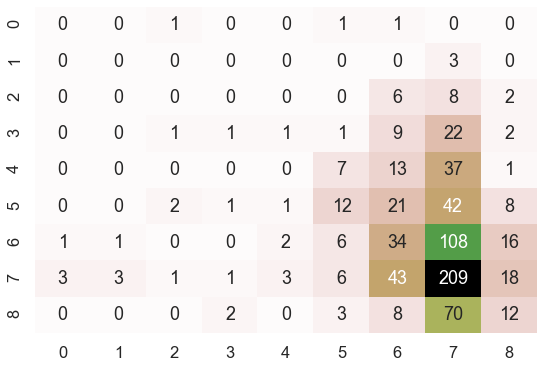

In [130]:
lrc1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 500)
lrc1.fit(X_train,y_train)
predictions = lrc1.predict(X_test)
print (accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions));


def heatconmat(y_true,y_pred):
    sns.set_context('talk')
    plt.figure(figsize=(9,6))
    sns.heatmap(confusion_matrix(y_true,y_pred),
                annot=True,
                fmt='d',
                cbar=False,
                cmap='gist_earth_r',
                yticklabels=sorted(y_test.unique()))
    plt.show()


heatconmat(y_test,predictions)

A 35.5% accuracy is what we obtain for the doc embeddings. This is clearly not as high as we expected, but given the various randomizations and hyper-parameter tuning required for such methods, we are content with it. It provides us a slightly different perspective on how to treat our text data.

Now, we want to visualize how these embeddings look like. To do that, we need to first cluster them in their n-dimensions and we'll then apply a dimensionality reduction method like PCA and t-SNE to explore the data. 

Let's first try to find out the optimal number of clusters using both elbow and silhouette score methods.

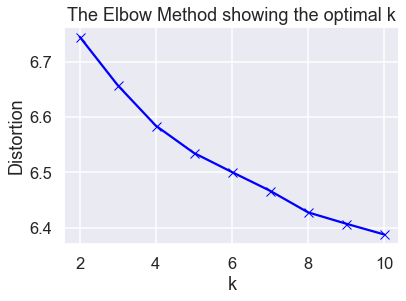

In [131]:
datapoint = model.docvecs.vectors_docs

# k means determine k
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', max_iter=100)
    kmeanModel.fit(datapoint)
    distortions.append(sum(np.min(cdist(datapoint, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #preds = kmeanModel.fit_predict(datapoint)
    #distortions.append(silhouette_score (datapoint, preds))
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow method doesn't seem too indicative. Let's try the silhouette score method. 

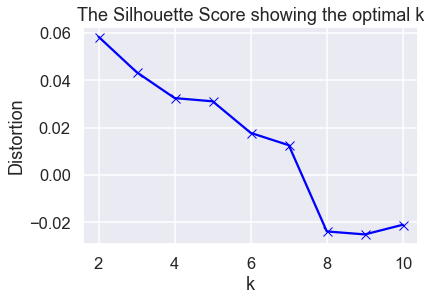

In [132]:
datapoint = model.docvecs.vectors_docs

# k means determine k
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', max_iter=100)
    preds = kmeanModel.fit_predict(datapoint)
    distortions.append(silhouette_score (datapoint, preds))
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Silhouette Score showing the optimal k')
plt.show()

9 is the optimal number. Now that we have our optimal number of clusters, lets cluster these and then reduce the dimensions. 

#### PCA Dimensionality Reduction and Visualization 

In [133]:
x = mcolors.CSS4_COLORS
label1 = []
j = 1
for i in x:
    label1.append(i)

label1 = random.choices(label1, k=9)
label1

['snow',
 'mediumvioletred',
 'darkgoldenrod',
 'aqua',
 'darkgray',
 'lightslategray',
 'dimgray',
 'olive',
 'gainsboro']

The above function is just used to select k random colors which we will use for our clusters. We first reduce the dimensions using PCA.

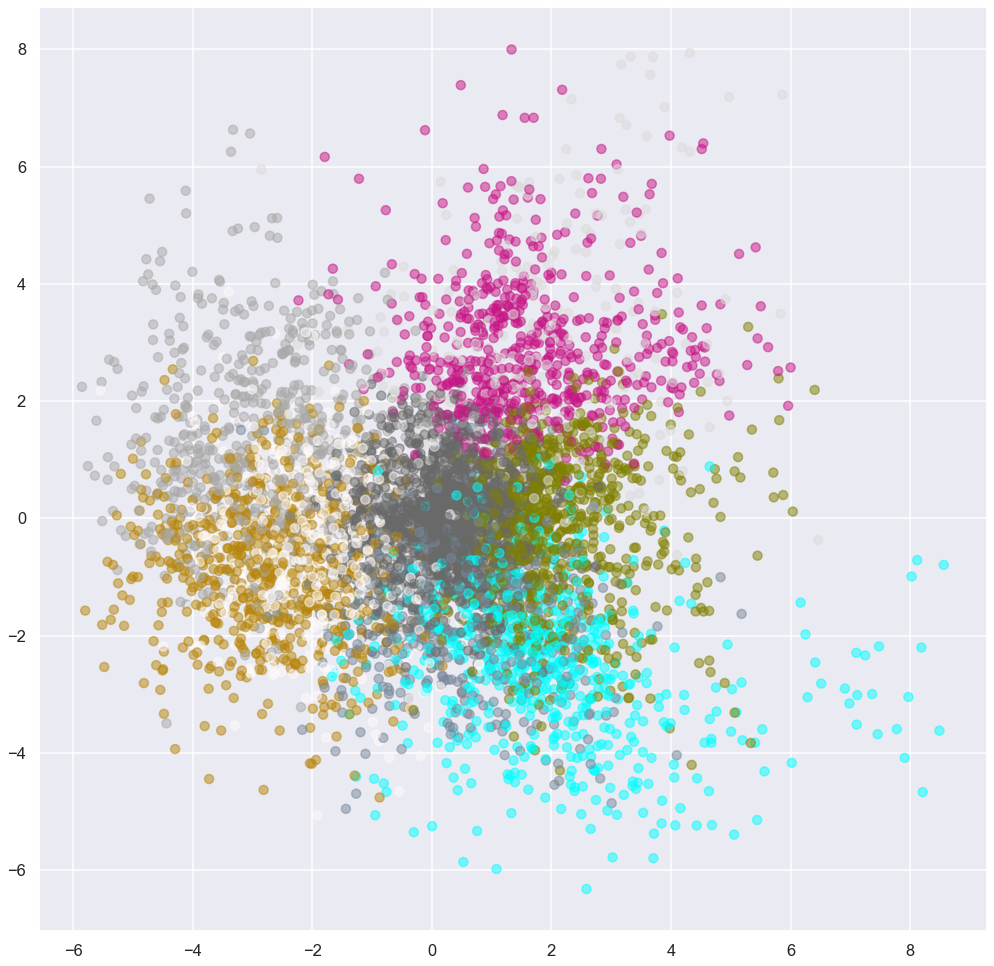

In [134]:
doc_vectors = model.docvecs.vectors_docs
pca = PCA(n_components=2)

kmeans_model = KMeans(n_clusters=9, init='k-means++', max_iter=100)  
kmeans_model.fit(doc_vectors)

labels=kmeans_model.labels_.tolist()
datapoint = pca.fit_transform(doc_vectors)

plt.figure(figsize=(17, 17))

color = [label1[i] for i in labels]

plt.scatter(datapoint[:, 0], datapoint[:, 1], alpha=0.5, c=color)

plt.show()


PCA seems to be doing a pretty good job. We can clearly identify a few unique clusters, but its also evident that there are major overlapping issues. 

We now also try out the t-SNE reduction, which is known to work really well for visualizations. 

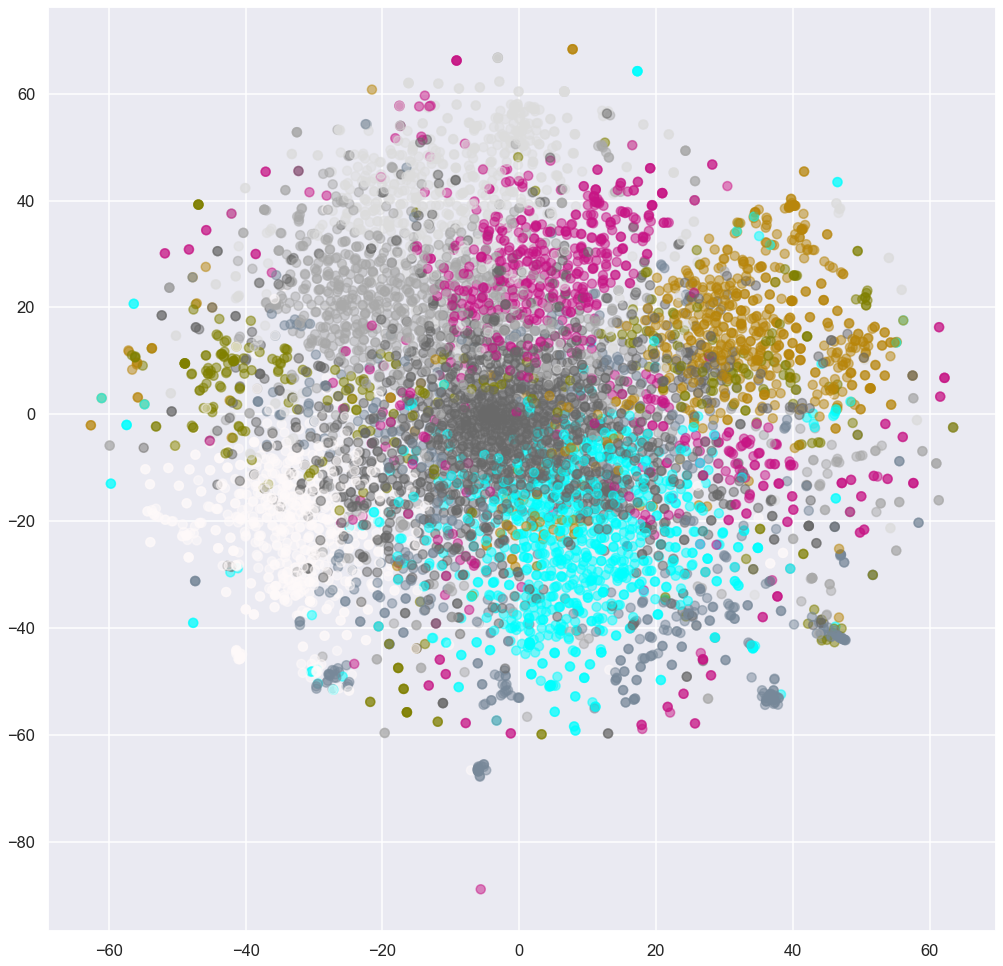

In [135]:
doc_vectors = model.docvecs.vectors_docs
tsne = TSNE(n_components=2)

kmeans_model = KMeans(n_clusters=9, init='k-means++', max_iter=100)  
kmeans_model.fit(doc_vectors)

labels=kmeans_model.labels_.tolist()
datapoint = tsne.fit_transform(doc_vectors)

plt.figure(figsize=(17, 17))

color = [label1[i] for i in labels]

plt.scatter(datapoint[:, 0], datapoint[:, 1], alpha=0.5, c=color)

plt.show()


The t-SNE is able to produce a similar sort of clustering, with still a lot of overlap. Observing the bottom right of the graph shows the occurence of a lot of micro-clusters. We tried to use an external tool to explore these, called d3-scatterplot, and we found out that these were highly similar games being clustered together ; some were clusters of original games with their updated versions while some others were clusters which had games with very similar wordings in the description. 

## Evaluation of Approaches and Limitation of Methods Used

Now that we're done with all our modeling and results, we can evaluate our approaches. We used a whole variety of methods on our dataset. Overall, in our first part of the project we were able to obtain around 38.5% accuracy on our highly imbalanced dataset. Additionally, the features discovered during the EDA were in line with the feature importance of our models (with some other surprising results). The approaches used led us to not very surprising results, and in the entire process we were also able to find some interesting patterns in the data. It's fair to point out that the heavy imbalance limits our predictions, but this was a known fact and we tried to optimize it as much as possible. The choice of final models is usecase-specific, but both models delivered similar results. Collapsing of the target classes would definitely help us achieve better scores, but for now we choose to use the dataset as is. 

For the second part of the project, we used a few of the NLP techniques on just one feature, the Description. Although the initial methods were fairly straightforward, they did yield very good results, at par or even higher than the methods used in part one. We tried a combination of different models, each a notch bit better than the previous one. We touched a 41% accuracy. The Doc2Vec methods didn't turn out as promising as we'd wanted them to be, but since this was the experimental part we were satisfied with the results. Visuailizing the embeddings in 2D did seem to be pretty intuitive as we could see clear clustering of similar games. We did not spend too much time analyzing each of the clustering, since this is very stochastic in nature, but at the surface we did identify some common patterns. The NLP methods are limited in their approach sometimes as they require a lot of parameter tuning and it is very domain-specific. For the scope of our project, we kept aside the parameter tuning and just showed the initial observations. 


## **Summary and Possible Future Work**

The first part of project gave us a model with a classification accuracy of 38.5%. The class imbalance was a known issue and therefore this limited our classification. The EDA we performed and the models' feature selection seemed aligned for the most part. Both our top models had a very different combination of features they deemed as important and this was surprising to know. We then explored a variety of NLP techniques as an experimental approach for using the description feature. The results were satisfactory and we explored the dataset visually to see how some games clustered together in higher dimensions.


Here are the highlights of some of the interesting findings based on our analysis:

1.   App games larger in size are likely to receive higher average user ratings.
2.   Apps that are well-maintained and regularly updated are likely to be rated higher than those without regular updates. 
3.   Age groups of 4+ are the most targeted audiences for game developers.
4.   A huge majority of strategy are still below <250MB in size, which indicates not all users like heavy games.
5.   In 2019, a very high number of strategy games got introduced in the AppStore which indicates a higher demand for this sector.


Possible Future work: 

1.   For parameter tuning, we can employ grid search for the various models used in this project.
2.   Scraping of additional data from the AppStore to look at the individual reviews of each games and build a more comprehensive understanding of the factors that affect ratings.
3.   Neural Networks can be used for predictions using all the features of the dataset (for the first part). It would be interesting to understand the feature selection. 
4.   For the natural language processing, we can experiment with more abstractive models like CNN to explore the data. 
5.   Methods like word embeddings can further be finetuned and used as part of recommender systems to promote games of 'similar' objectives and themes.





## References

https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py
